# Regresión Logística

La **regresión logística** es un modelo estadístico y de machine learning utilizado para predecir la probabilidad de que una observación pertenezca a una de dos clases posibles (clasificación binaria). A diferencia de la regresión lineal, que predice valores continuos, la regresión logística predice probabilidades que luego se pueden convertir en etiquetas de clase (por ejemplo, 0 o 1).

La función principal de la regresión logística es la función sigmoide o logística, que transforma cualquier valor real en un rango entre 0 y 1:

$$
P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)}}
$$

donde:
- $P(y=1|x)$ es la probabilidad de que la variable dependiente $y$ sea 1 dado $x$,
- $\beta_0$ es el intercepto,
- $\beta_1, \dots, \beta_n$ son los coeficientes de las variables independientes $x_1, \dots, x_n$.

La predicción final se obtiene aplicando un umbral (por defecto 0.5): si la probabilidad es mayor o igual a 0.5, se predice la clase 1; si es menor, la clase 0.

**Ejemplo: Regresión logística con scikit-learn**

Supongamos que queremos predecir si un estudiante aprueba (1) o no (0) un examen en función de sus horas de estudio.

En este ejemplo, el modelo estima la probabilidad de aprobar en función de las horas de estudio y traza la curva logística resultante.

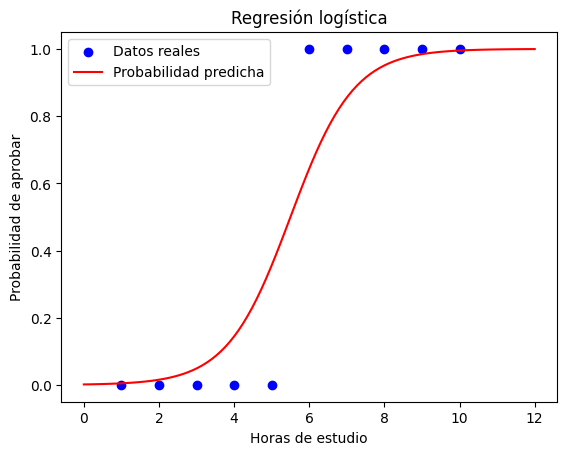

In [12]:
#Ejemplo: Regresión logística con scikit-learn
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Datos de ejemplo
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Crear y entrenar el modelo
modelo_log = LogisticRegression()
modelo_log.fit(X, y)

# Predicciones de probabilidad
X_test = np.linspace(0, 12, 100).reshape(-1, 1)
y_prob = modelo_log.predict_proba(X_test)[:, 1]

# Visualización
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X_test, y_prob, color='red', label='Probabilidad predicha')
plt.xlabel('Horas de estudio')
plt.ylabel('Probabilidad de aprobar')
plt.legend()
plt.title('Regresión logística')
plt.show()

Además de la función sigmoide (logística), en regresión logística y modelos de clasificación se pueden utilizar otras funciones de enlace (*link functions*) para modelar la probabilidad, especialmente en el contexto de modelos lineales generalizados (GLM):

- **Función softmax:**  
    Se utiliza en la regresión logística multinomial (clasificación multiclase). Generaliza la sigmoide para más de dos clases y transforma un vector de valores en probabilidades que suman 1.
    **Definición:**  
    La función **softmax** es una función de enlace utilizada principalmente en problemas de clasificación multiclase. Toma como entrada un vector de valores reales (logits) y los transforma en un vector de probabilidades, donde cada valor está en el rango (0, 1) y la suma total es 1. Esto permite interpretar la salida como la probabilidad de pertenencia a cada clase.

    **Ecuación matemática:**  
    Para un vector de puntuaciones $z = [z_1, z_2, ..., z_K]$, la función softmax para la clase $j$ se define como:

    $$
    \text{softmax}(z_j) = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}
    $$

    donde $K$ es el número total de clases.

    **Ejemplos de uso en la vida real:**
    - **Reconocimiento de imágenes:** En redes neuronales para clasificación de imágenes (por ejemplo, identificar si una foto es de un perro, gato o pájaro), la capa de salida suele usar softmax para asignar una probabilidad a cada clase.
    - **Procesamiento de lenguaje natural:** En modelos de clasificación de texto, como análisis de sentimientos o categorización de correos electrónicos, softmax se utiliza para predecir la probabilidad de cada categoría posible.
    - **Sistemas de recomendación:** Para predecir la probabilidad de que un usuario elija entre varias opciones (productos, películas, etc.).
    - **Diagnóstico médico asistido:** Para estimar la probabilidad de diferentes diagnósticos posibles dados los síntomas de un paciente.

**Ejemplo en Python:**  
    Para aplicar la función softmax en Python se puede usar `scipy.special.softmax` o implementarla manualmente. Aquí un ejemplo sencillo:


- **Función probit:**  
    Utiliza la función de distribución acumulada de la normal estándar. Es común en modelos de regresión probit, una alternativa a la regresión logística.
    La **regresión probit** es un modelo estadístico utilizado para problemas de clasificación binaria, similar a la regresión logística, pero en lugar de la función sigmoide utiliza la función de distribución acumulada de la normal estándar (función probit) como función de enlace. El modelo estima la probabilidad de que una observación pertenezca a una clase en función de las variables independientes, asumiendo que el error sigue una distribución normal. Es especialmente útil cuando se cree que el proceso subyacente que determina la probabilidad de éxito es normal en lugar de logístico.
    La función probit se define como la inversa de la función de distribución acumulada (CDF) de la normal estándar. Matemáticamente:

    $$
    P(y=1|x) = \Phi(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)
    $$

    donde $\Phi$ es la CDF de la normal estándar.

    **Ejemplos de uso en la realidad:**
    - **Economía:** Modelar la probabilidad de que un consumidor compre un producto en función de variables como precio, ingreso, etc.
    - **Medicina:** Estimar la probabilidad de éxito de un tratamiento según dosis y características del paciente.
    - **Finanzas:** Predecir la probabilidad de impago de un crédito según variables del solicitante.
    - **Psicometría:** Analizar respuestas binarias (acierto/error) en tests, considerando la habilidad latente del examinado.

    
    En este ejemplo, se estima la probabilidad de aprobar en función de las horas de estudio usando la función probit.


- **Función log-log y complementary log-log (cloglog):**  
    Se emplean en situaciones donde la probabilidad de éxito crece o decrece rápidamente. La cloglog es útil cuando los eventos raros tienen un crecimiento asimétrico.
    **Función log-log:**  
    La función de enlace log-log se define matemáticamente como:

    $$
    g(p) = \log(-\log(1 - p))
    $$

    donde $p$ es la probabilidad de éxito. Su inversa es:

    $$
    p = 1 - \exp(-\exp(\eta))
    $$

    donde $\eta$ es la combinación lineal de las variables independientes.

    **Función complementary log-log (cloglog):**  
    La función cloglog se define como:

    $$
    g(p) = \log(-\log(1 - p))
    $$

    y su inversa:

    $$
    p = 1 - \exp(-\exp(\eta))
    $$

    **Ejemplos de uso en la vida real:**
    - **Cloglog:** Muy utilizada en análisis de supervivencia y modelos de tiempo hasta evento, como el riesgo de fallo de una máquina en un periodo de tiempo o la probabilidad de que un paciente experimente un evento adverso en un estudio clínico.
    - **Log-log:** Se emplea en modelos de duración y supervivencia cuando el riesgo de ocurrencia de un evento cambia de manera asimétrica a lo largo del tiempo, por ejemplo, en estudios de fiabilidad de componentes electrónicos o en análisis actuariales.

**Resumen:**  
- Sigmoide: clasificación binaria estándar  
- Softmax: clasificación multiclase  
- Probit: alternativa basada en la normal  
- Log-log y cloglog: para distribuciones asimétricas de probabilidad

Cada función de enlace tiene aplicaciones específicas según la naturaleza de los datos y el problema de clasificación.